In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.applications.mobilenet import preprocess_input
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import applications
from tensorflow.keras.layers import BatchNormalization,Conv2D, AveragePooling2D,TimeDistributed,Dense, Dropout, Activation, Flatten,GlobalAveragePooling2D,MaxPool2D
class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('val_accuracy')>0.94):

      print("\nReached 98% accuracy so cancelling training!")

      self.model.stop_training = True

In [0]:
pickle_in = open("/content/drive/My Drive/Dataset/X1.pickle","rb")
X = pickle.load(pickle_in)


pickle_in = open("/content/drive/My Drive/Dataset/y1.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
%load_ext tensorboard
# # %reload_ext tensorboard
%tensorboard --logdir {logs_base_dir}

In [0]:
X = X/255.0
X=np.array(X)
y=np.array(y)
img_height,img_width=300,300
base_model = applications.densenet.DenseNet121(weights= None, include_top=False, input_shape= (img_height,img_width,1))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 300, 300, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [0]:
callbacks = myCallback()
history=model.fit(X, y, batch_size=32, epochs=1, validation_split=0.2,callbacks=[callbacks])

113/113 [==============================] - 146s 1s/step - loss: 0.6213 - accuracy: 0.8086 - val_loss: 3.8903 - val_accuracy: 0.3356


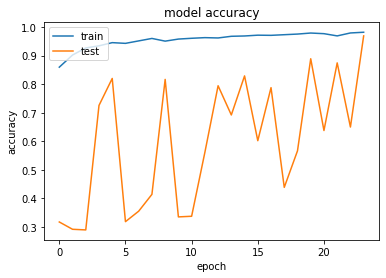

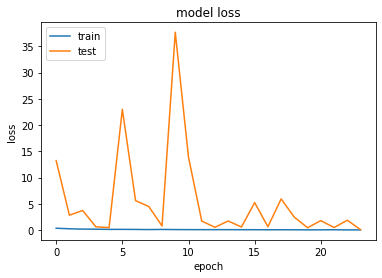

In [0]:
model.save('/content/drive/My Drive/Model/02densenet.h5')
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
def prepare(ima):
    IMG_SIZE = 300  # 50 in txt-based
    img_array = cv2.cvtColor(ima,cv2.COLOR_BGR2GRAY)
    img_array=img_array/255.0  # filepathread in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1,IMG_SIZE, IMG_SIZE,1)

def disease(q):
    if(q==0):
        q="COVID19"
    elif(q==1):
        q="NORMAL"
    elif(q==2):
        q="PNEUMONIA"
    else:
        q="UNKNOWN"
    return str(q)

In [13]:
model=tf.keras.models.load_model("01densenet.h5")

In [15]:
import cv2
for i in range(1,50):
  img=cv2.imread("Dataset/VALIDATION/COVID19/"+str(i)+".jpeg")
  a=np.argmax(model.predict(prepare(img)))    
  print(disease(a))

COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19
COVID19


In [0]:
model=tf.keras.models.load_model("/content/drive/My Drive/Model/01densenet.h5")
print(len(X))
print(len(y))


4500
4500


In [0]:
predict=np.empty(len(y),dtype='int')
actual=y
import cv2
for i in range(0,len(y)-1):
  img=X[i]
  a=np.argmax(model.predict(prepare(img)))    
  predict[i]=a

In [0]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
   
results = confusion_matrix(actual, predict) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predict)) 
print ('Report : ')
print (classification_report(actual, predict)) 

Confusion Matrix :
[[159   0   0   1]
 [  3  39  41   0]
 [  1   6 153   0]
 [  0   0   0   0]]
Accuracy Score : 0.8709677419354839
Report : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       160
           1       0.87      0.47      0.61        83
           2       0.79      0.96      0.86       160
    10914464       0.00      0.00      0.00         0

    accuracy                           0.87       403
   macro avg       0.66      0.60      0.61       403
weighted avg       0.88      0.87      0.86       403



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
